In [1]:
# data science
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

# API
import requests
import json

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, text, inspect, func

In [2]:
# Create engine using the `spacex.sqlite` database file
engine = create_engine("sqlite:///ufo.sqlite")

In [3]:
# INSPECT to confirm existence

# Create the inspector and connect it to the engine
inspector_gadget = inspect(engine)

# Collect the names of tables within the database
tables = inspector_gadget.get_table_names()

# print metadata for each table
for table in tables:
    print(table)
    print("-----------")
    
    # get columns
    columns = inspector_gadget.get_columns(table)
    for column in columns:
        print(column["name"], column["type"])

    print()

ufo
-----------
datetime DATETIME
city TEXT
state TEXT
country TEXT
shape TEXT
duration_seconds FLOAT
duration_hours_min TEXT
comments TEXT
date_posted TEXT
latitude FLOAT
longitude  FLOAT
hour INTEGER
month INTEGER
year INTEGER
dayofweek TEXT



In [ ]:
# min_duration

In [10]:
# build the query
query = f"""
SELECT *
FROM ufo
-- WHERE shape != 'unknown' AND city != 'unknown' AND state != 'unknown' AND country != 'unknown' AND comments != 'unknown' 
"""

# execute query
shape_df = pd.read_sql(text(query), con=engine)
shape_df.head(10)

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,1994-10-10 18:30:00.000000,burnt hills,ny,us,rectangle,120.0,2 minutes,Giant rectangular craft (resembling an upside-...,10/23/2013,42.909722,-73.895556
1,1994-10-10 22:00:00.000000,pinebergen,ar,us,light,5.0,5 seconds,Round&#44 bright&#44 low flying object silentl...,2/18/2001,34.102778,-91.992222
2,1995-10-10 19:45:00.000000,milwaukee,wi,us,unknown,120.0,2 min.,Man on Hwy 43 SW of Milwaukee sees large&#44 ...,11/2/1999,43.038889,-87.906389
3,1995-10-10 22:40:00.000000,oakland,ca,us,unknown,60.0,1 minute,Woman repts. bright light in NW sky&#44 sudde...,11/2/1999,37.804444,-122.269722
4,1996-10-10 03:20:00.000000,higginsville,mo,us,triangle,3.0,3sec,illuminated triangular craft&#44 flying at hig...,2/16/2000,39.072500,-93.716944
5,1996-10-10 22:00:00.000000,charleston,sc,us,light,300.0,5 min,Flashing object above Charleston&#44 SC,11/26/2003,32.776389,-79.931111
6,1996-10-10 22:30:00.000000,monroe county,oh,us,cylinder,60.0,1 minute,Looked like it went through the hillside,7/8/2004,39.440278,-84.362222
7,1997-10-10 17:00:00.000000,mesa,az,us,sphere,30.0,30 seconds,A small dark purple quad-thruster craft hoveri...,2/14/2008,33.422222,-111.821944
8,1997-10-10 20:00:00.000000,bonaire,ga,us,triangle,300.0,<5 minutes,Triangular Object Sighted at Very Close Range,2/1/2007,32.543611,-83.596111
9,1997-10-10 21:00:00.000000,austin,mn,us,other,3600.0,1-hour,i was traveling northbound on state highway 10...,1/28/1999,43.666667,-92.974444


In [9]:
shape_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52969 entries, 0 to 52968
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              52969 non-null  object 
 1   city                  52969 non-null  object 
 2   state                 52969 non-null  object 
 3   country               52969 non-null  object 
 4   shape                 52969 non-null  object 
 5   duration (seconds)    52969 non-null  float64
 6   duration (hours/min)  52969 non-null  object 
 7   comments              52969 non-null  object 
 8   date posted           52969 non-null  object 
 9   latitude              52969 non-null  float64
 10  longitude             52969 non-null  float64
dtypes: float64(3), object(8)
memory usage: 4.4+ MB


In [7]:
query = f"""
SELECT *
FROM ufo
WHERE shape = 'unknown';
"""

# execute query
df = pd.read_sql(text(query), con=engine)
df.head(10)


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,1995-10-10 19:45:00.000000,milwaukee,wi,us,unknown,120.0,2 min.,Man on Hwy 43 SW of Milwaukee sees large&#44 ...,11/2/1999,43.038889,-87.906389
1,1995-10-10 22:40:00.000000,oakland,ca,us,unknown,60.0,1 minute,Woman repts. bright light in NW sky&#44 sudde...,11/2/1999,37.804444,-122.269722
2,1999-10-10 04:00:00.000000,kansas city,ks,us,unknown,600.0,5-10 min.,Orange object over city.,10/19/1999,39.114167,-94.627222
3,2000-10-10 21:30:00.000000,seattle (west),wa,us,unknown,10.0,10 sec,Dark object in the shape of a (4) after dusk i...,2/11/2003,47.606389,-122.330833
4,2002-10-10 02:00:00.000000,philomath,or,us,unknown,5.0,about5seconds,i watched on the portland news that the space ...,10/15/2002,44.540278,-123.366389
5,2004-10-10 15:00:00.000000,berkeley,ca,us,unknown,180.0,3 minutes,While driving my car in the mid afternoon of a...,5/24/2005,37.871667,-122.271667
6,2005-10-10 21:00:00.000000,lewisburg,tn,us,unknown,240.0,4 minutes,Like a grouping of balloons with a slight glow...,12/7/2006,35.449167,-86.788889
7,2006-10-10 12:37:00.000000,blairsville,ga,us,unknown,10.0,<10 sec.,Intermittant streak by moon&#44 not seen on ph...,10/30/2006,34.876111,-83.958333
8,2006-10-10 23:00:00.000000,lyndhurst,oh,us,unknown,300.0,5 minutes,This is a follow up to my Feb. 16th&#44 1995 r...,10/30/2006,41.520000,-81.488889
9,2007-10-10 20:30:00.000000,conyers,ga,us,unknown,3600.0,1 hour,Craft seen falling and dissapears into thin ai...,11/28/2007,33.667500,-84.017778


In [12]:
# user inputs
user_region = 'All'
user_min_attempts = 0

# switch on user_region
if user_region == 'All':
    where_clause = "and 1=1"
else:
    where_clause = f"and region = '{user_region}'"

# build the query
query = f"""
    SELECT
        name,
        region,
        launch_attempts
    FROM
        launchpads
    WHERE
        launch_attempts >= {user_min_attempts}
        {where_clause}
    ORDER BY
        launch_attempts DESC;
"""

# execute query
pie_df = pd.read_sql(text(query), con=engine)
pie_df.head(10)

,name,region,launch_attempts
0,CCSFS SLC 40,Florida,99
1,KSC LC 39A,Florida,55
2,VAFB SLC 4E,California,28
3,Kwajalein Atoll,Marshall Islands,5
4,VAFB SLC 3W,California,0
5,STLS,Texas,0


In [13]:
# user inputs
user_region = 'All'
user_min_attempts = 0

# switch on user_region
if user_region == 'All':
    where_clause = "and 1=1"
else:
    where_clause = f"and region = '{user_region}'"

# build the query
query = f"""
    SELECT
        name,
        full_name,
        region,
        latitude,
        longitude,
        launch_attempts,
        launch_successes,
        launch_attempts - launch_successes as launch_failures
    FROM
        launchpads
    WHERE
        launch_attempts >= {user_min_attempts}
        {where_clause}
    ORDER BY
        launch_attempts DESC;
"""

# execute query
table_df = pd.read_sql(text(query), con=engine)
table_df.head(10)

,name,full_name,region,latitude,longitude,launch_attempts,launch_successes,launch_failures
0,CCSFS SLC 40,Cape Canaveral Space Force Station Space Launc...,Florida,28.561857,-80.577366,99,97,2
1,KSC LC 39A,Kennedy Space Center Historic Launch Complex 39A,Florida,28.608058,-80.603956,55,55,0
2,VAFB SLC 4E,Vandenberg Space Force Base Space Launch Compl...,California,34.632093,-120.610829,28,27,1
3,Kwajalein Atoll,Kwajalein Atoll Omelek Island,Marshall Islands,9.047721,167.743129,5,2,3
4,VAFB SLC 3W,Vandenberg Space Force Base Space Launch Compl...,California,34.644090,-120.593144,0,0,0
5,STLS,SpaceX South Texas Launch Site,Texas,25.997264,-97.156085,0,0,0


In [14]:
# user inputs
user_region = 'All'
user_min_attempts = 0

# switch on user_region
if user_region == 'All':
    where_clause = "and 1=1"
else:
    where_clause = f"and region = '{user_region}'"

# build the query
query = f"""
    SELECT
        name,
        full_name,
        region,
        latitude,
        longitude,
        launch_attempts,
        launch_successes,
        launch_attempts - launch_successes as launch_failures
    FROM
        launchpads
    WHERE
        launch_attempts >= {user_min_attempts}
        {where_clause}
    ORDER BY
        launch_attempts DESC;
"""

# execute query
map_df = pd.read_sql(text(query), con=engine)
map_df.head(10)

,name,full_name,region,latitude,longitude,launch_attempts,launch_successes,launch_failures
0,CCSFS SLC 40,Cape Canaveral Space Force Station Space Launc...,Florida,28.561857,-80.577366,99,97,2
1,KSC LC 39A,Kennedy Space Center Historic Launch Complex 39A,Florida,28.608058,-80.603956,55,55,0
2,VAFB SLC 4E,Vandenberg Space Force Base Space Launch Compl...,California,34.632093,-120.610829,28,27,1
3,Kwajalein Atoll,Kwajalein Atoll Omelek Island,Marshall Islands,9.047721,167.743129,5,2,3
4,VAFB SLC 3W,Vandenberg Space Force Base Space Launch Compl...,California,34.644090,-120.593144,0,0,0
5,STLS,SpaceX South Texas Launch Site,Texas,25.997264,-97.156085,0,0,0


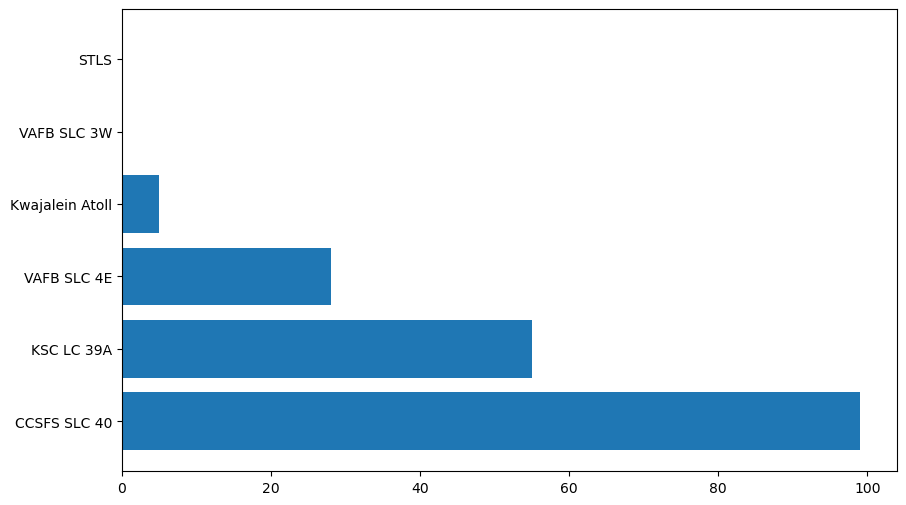

In [17]:
# practice making visuals
plt.figure(figsize=(10, 6))
plt.barh(df.name, df.launch_attempts)
plt.show()